In [1]:
#Step1 - Import csv file
import pandas as pd

data = pd.read_csv('C:/Users/premchand.joshi/Python-11June23/Statistics/Course2/LendingClubCaseStudy/loan/loan.csv')
data.head()

C:\Users\premchand.joshi\AppData\Local\Temp\ipykernel_14040\1130917623.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/premchand.joshi/Python-11June23/Statistics/Course2/LendingClubCaseStudy/loan/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
#Step2 - Check columns where more than 30k have null values
miss_column = data.columns[data.isnull().sum() > 30000]
print(miss_column)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [3]:
#Step3: Drop those columns where more than 30k have null values
df = data.drop(miss_column, axis=1)
df.shape

(39717, 55)

In [4]:
#Step4: Drop rows where more than 5 columns are null
df=df.drop(df[df.isnull().sum(axis=1) > 5].index, axis=0)

In [5]:
df.shape

(39713, 55)

In [6]:
#Step5: data manipulate int_rate
df['int_rate'] = df['int_rate'].str.split('%').str[0]
df['int_rate'] = pd.to_numeric(df['int_rate'] )
df['int_rate'].info

<bound method Series.info of 0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39716    13.75
Name: int_rate, Length: 39713, dtype: float64>

In [7]:
#Step6: Remove rows where employement length is missing 
df=df[~df['emp_length'].isnull()]

In [8]:
df.shape

(38638, 55)

In [9]:
#Step7: Extract numbers from emp_length
df['emp_length']=df['emp_length'].str.extract('(\d+)')

In [10]:
#Step8: check if only one category have significant rows then we can drop rows for those categories where not contribute more
#But here both terms (36,60) have significant contribution so keep as is
df_term=df.groupby(['term'])['member_id'].agg('count')
df_term

term
 36 months    28283
 60 months    10355
Name: member_id, dtype: int64

([<matplotlib.patches.Wedge at 0x27ea1d31840>,
 [Text(-0.7326119614316622, 0.8205362356211046, '36 months'),
  Text(0.7326119614316621, -0.8205362356211047, '60 months')])

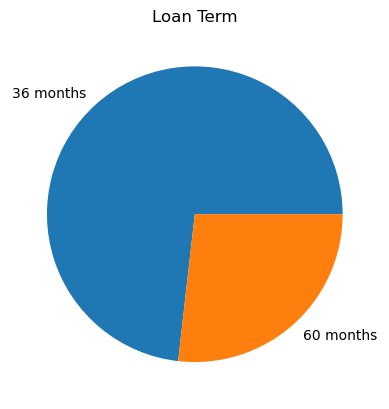

In [12]:
#Step9: Draw plot for Term
import matplotlib.pyplot as plt
labels = '36 months', '60 months'
sizes = df['term'].value_counts()

fig, ax = plt.subplots()
ax.set_title('Loan Term')
ax.pie(sizes, labels=labels)

In [13]:
#Step10: check emp_length
df_emp=df.groupby(['emp_length'])['member_id'].agg('count')
df_emp

emp_length
1     7819
10    8879
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: member_id, dtype: int64

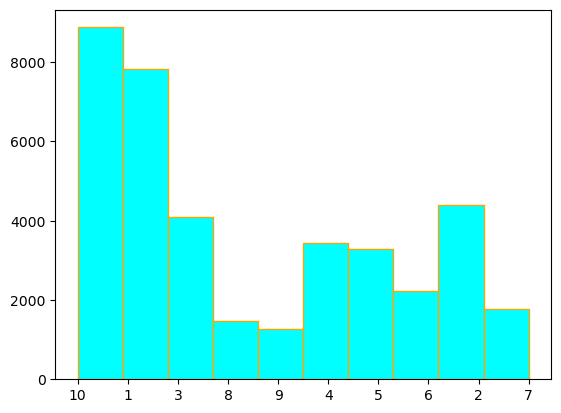

In [14]:
#Step11: Draw plot for employment length
plt.hist(df['emp_length'], edgecolor='Orange', color='Cyan')
plt.show()

In [15]:
#Step12: check contribution of various Grade categories
#we can keep as is
#Grades and Sub-Grades are typically used by lenders to determine the interest rate and
#other terms of a loan (LendingClub, 2019). The higher the grade, the lower the credit
#risk, and the more favorable the loan terms are likely to be.
df_grade=df.groupby(['grade'])['member_id'].agg('count')
df_grade

grade
A     9693
B    11684
C     7926
D     5195
E     2795
F     1030
G      315
Name: member_id, dtype: int64

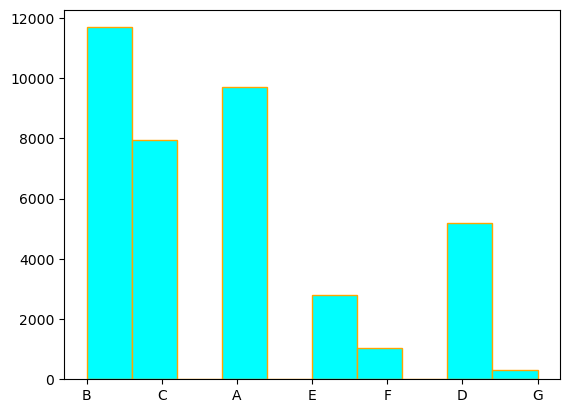

In [16]:
#Step13: Draw plot for Grade
plt.hist(df['grade'], edgecolor='Orange', color='Cyan')
plt.show()

In [17]:
#Step14: check contribution of various categories of home ownership
#keep as is
df_home=df.groupby(['home_ownership'])['member_id'].agg('count')
df_home

home_ownership
MORTGAGE    17210
NONE            1
OTHER          98
OWN          2841
RENT        18488
Name: member_id, dtype: int64

In [18]:
#Step15: #check contribution of various categories of loan_status
df_status=df.groupby(['loan_status'])['member_id'].agg('count')
df_status


loan_status
Charged Off     5399
Current         1098
Fully Paid     32141
Name: member_id, dtype: int64

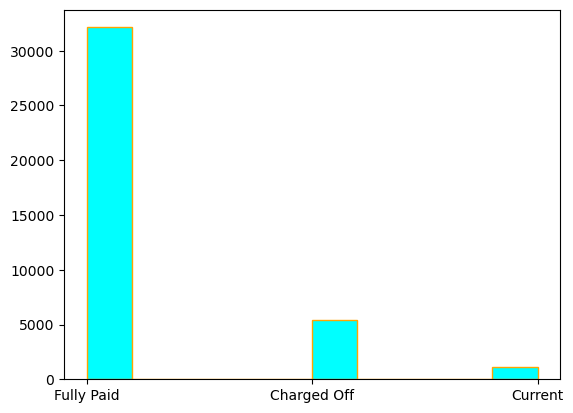

In [19]:
#Step16: Draw plot for loan status
plt.hist(df['loan_status'], edgecolor='Orange', color='Cyan')
plt.show()

In [20]:
#Step17: check contribution of various categories of verification_status
df_verify=df.groupby(['verification_status'])['member_id'].agg('count')
df_verify

verification_status
Not Verified       16494
Source Verified     9791
Verified           12353
Name: member_id, dtype: int64

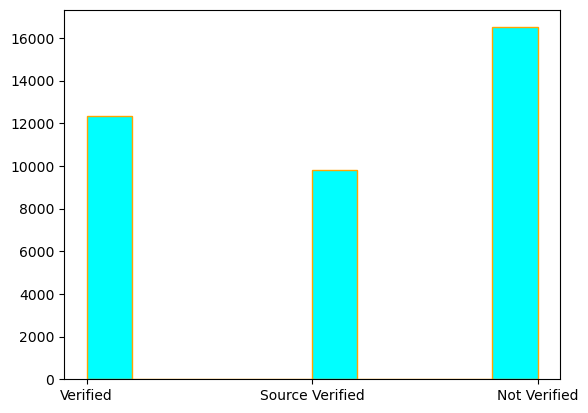

In [21]:
#Step18: Draw plot for verification status 
plt.hist(df['verification_status'], edgecolor='Orange', color='Cyan')
plt.show()

In [22]:
#Step19: check contribution of various categories of application_type
df_application=df.groupby(['application_type'])['member_id'].agg('count')
df_application

application_type
INDIVIDUAL    38638
Name: member_id, dtype: int64

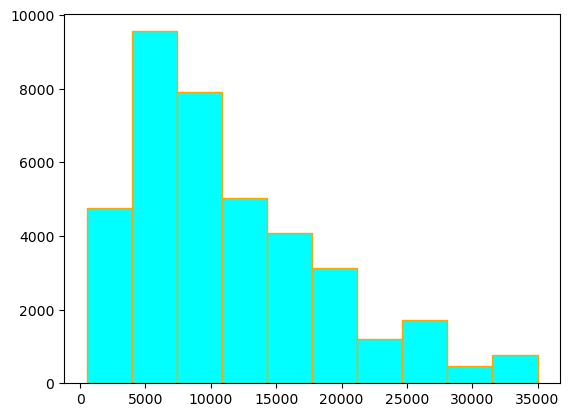

In [23]:
#Step20: check contribution of various categories of verification_status
plt.hist(df['loan_amnt'], edgecolor='Orange', color='Cyan')
plt.show()

C:\Users\premchand.joshi\AppData\Local\Temp\ipykernel_14040\3495962360.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True, linewidths=.75)


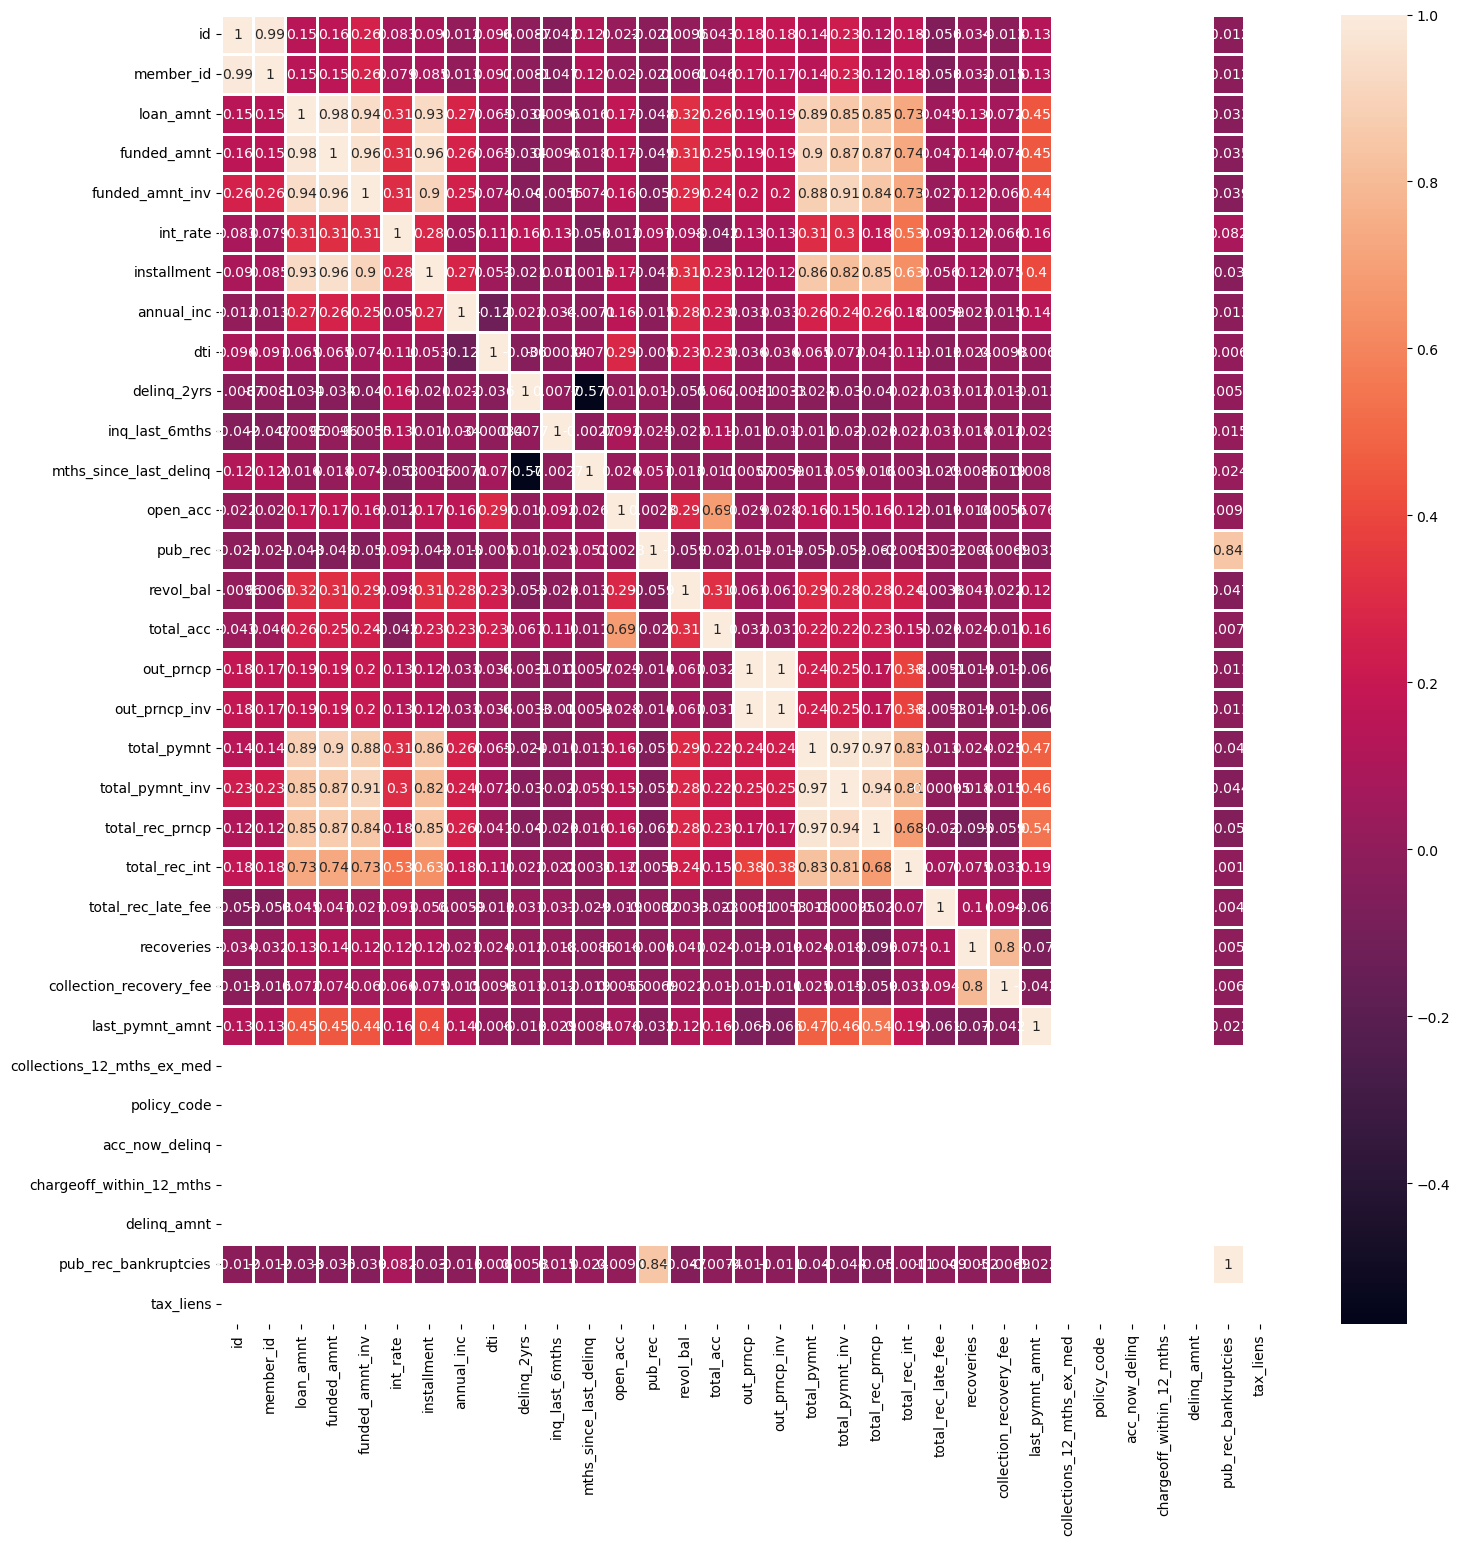

In [24]:
#Step21: check correlation between variables especially with loan_status
import seaborn as sns
fig, ax = plt.subplots(figsize=(17,17))   
ax = sns.heatmap(df.corr(), annot=True, linewidths=.75)

emp_length      1    10     2     3     4     5     6     7     8     9
loan_status                                                            
Charged Off  1095  1331   567   555   462   458   307   263   203   158
Current       146   391    97    83    94    88    61    62    44    32
Fully Paid   6578  7157  3724  3457  2880  2736  1861  1448  1232  1068


<Axes: xlabel='loan_status'>

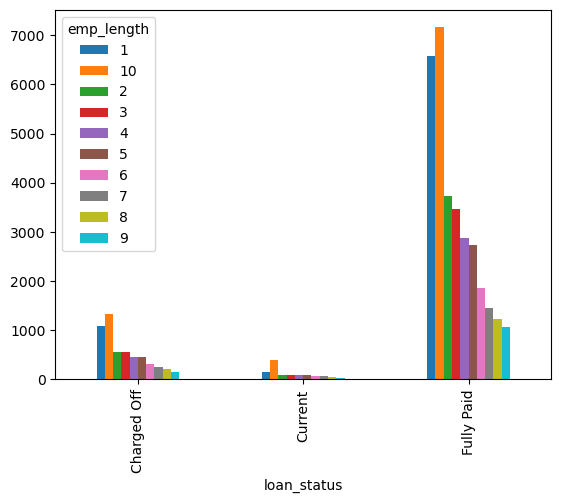

In [25]:
#Step22: check bivariate analysis between loan status and emp length
CrosstabResult=pd.crosstab(index=df['loan_status'],columns=df['emp_length'])
print(CrosstabResult)
CrosstabResult.plot.bar()

<Axes: xlabel='loan_status', ylabel='int_rate'>

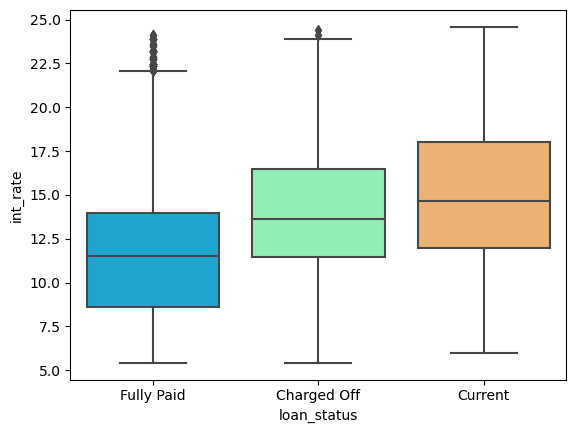

In [26]:
#Step23: check bivariate analysis between loan status and int_rate
sns.boxplot(x='loan_status',y='int_rate',data=df,palette='rainbow')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

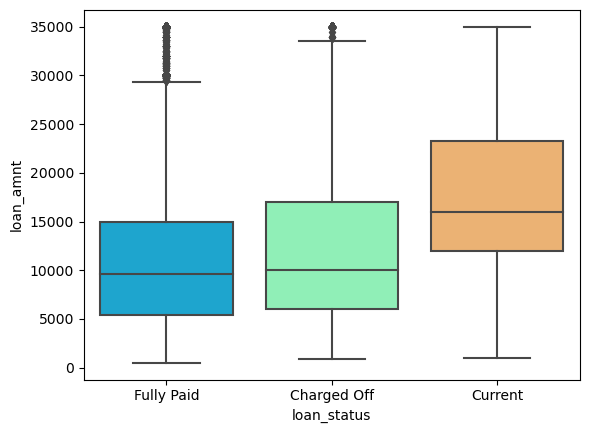

In [27]:
#Step24: check bivariate analysis between loan status and loan_amnt
sns.boxplot(x='loan_status',y='loan_amnt',data=df,palette='rainbow')

home_ownership  MORTGAGE  NONE  OTHER   OWN   RENT
loan_status                                       
Charged Off         2245     0     18   400   2736
Current              617     0      0    71    410
Fully Paid         14348     1     80  2370  15342


<Axes: xlabel='loan_status'>

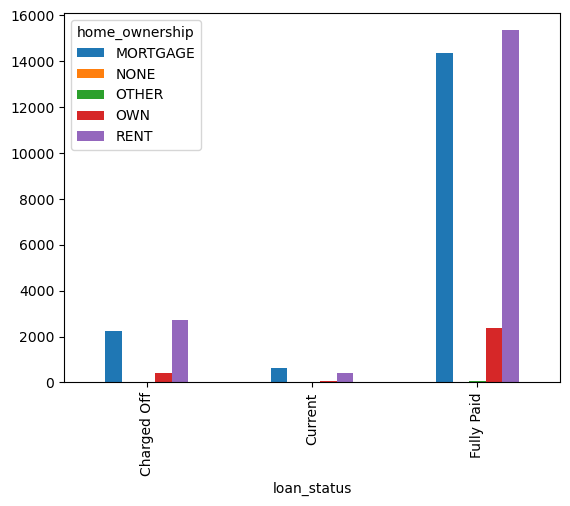

In [28]:
#Step25: check bivariate analysis between loan status and home_ownership
CrosstabResult=pd.crosstab(index=df['loan_status'],columns=df['home_ownership'])
print(CrosstabResult)
CrosstabResult.plot.bar()

verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off                  2049             1396      1954
Current                       220              297       581
Fully Paid                  14225             8098      9818


<Axes: xlabel='loan_status'>

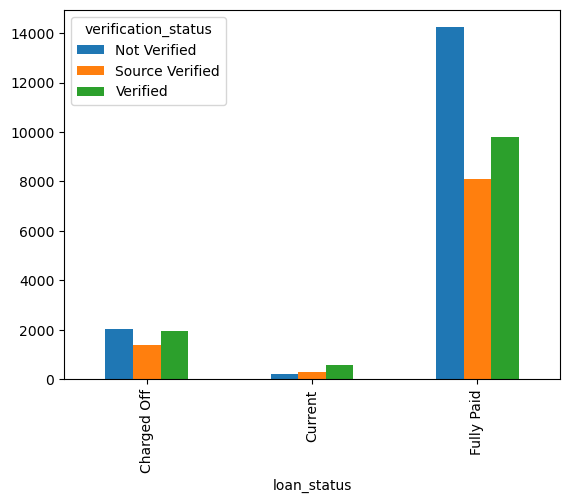

In [29]:
#Step26: check bivariate analysis between loan status and verification_status
CrosstabResult=pd.crosstab(index=df['loan_status'],columns=df['verification_status'])
print(CrosstabResult)
CrosstabResult.plot.bar()

grade           A      B     C     D     E    F    G
loan_status                                         
Charged Off   558   1355  1288  1085   700  313  100
Current        35    327   257   216   175   71   17
Fully Paid   9100  10002  6381  3894  1920  646  198


<Axes: xlabel='loan_status'>

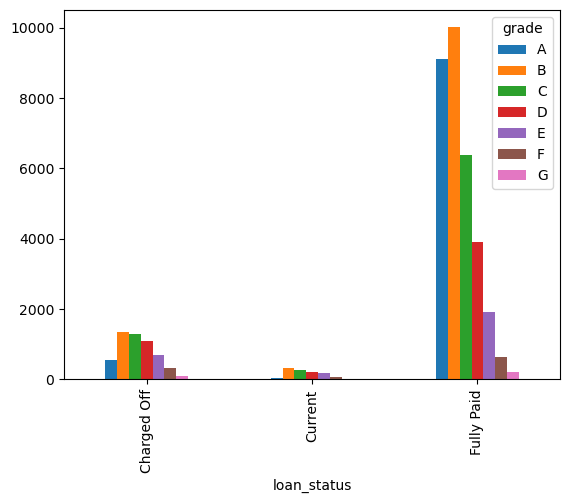

In [30]:
#Step27: check bivariate analysis between loan status and grade
CrosstabResult=pd.crosstab(index=df['loan_status'],columns=df['grade'])
print(CrosstabResult)
CrosstabResult.plot.bar()

purpose       car  credit_card  debt_consolidation  educational  \
loan_status                                                       
Charged Off   155          510                2679           52   
Current        49          101                 567            0   
Fully Paid   1293         4389               14995          265   

purpose      home_improvement  house  major_purchase  medical  moving  other  \
loan_status                                                                    
Charged Off               330     59             211      101      84    596   
Current                    94     14              35       12       7    120   
Fully Paid               2455    295            1869      555     468   3114   

purpose      renewable_energy  small_business  vacation  wedding  
loan_status                                                       
Charged Off                18             462        50       92  
Current                     1              73         4       

<Axes: xlabel='loan_status'>

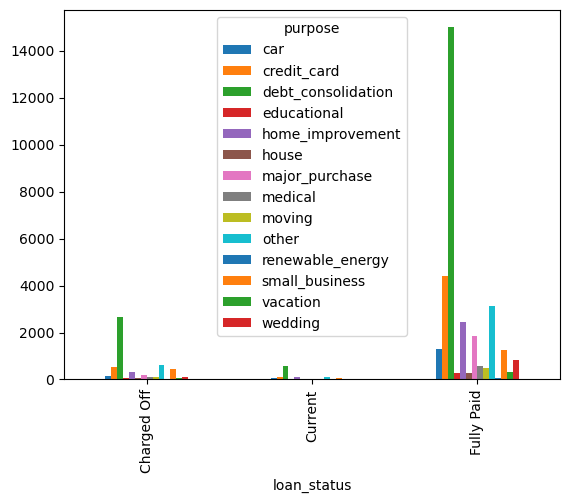

In [31]:
#Step28: check bivariate analysis between loan status and purpose
CrosstabResult=pd.crosstab(index=df['loan_status'],columns=df['purpose'])
print(CrosstabResult)
CrosstabResult.plot.bar()